In [101]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import pdb
import numpy as np

In [96]:
from inca.models.image import Image

In [97]:
i = Image.get(849555)
pan = i.get_panchromatic_asset()
pan.download_asset()


/tmp/73bbc9dad058454a85c911251733838b.npz


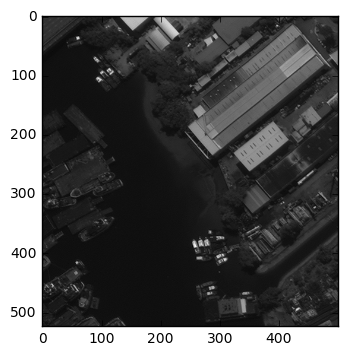

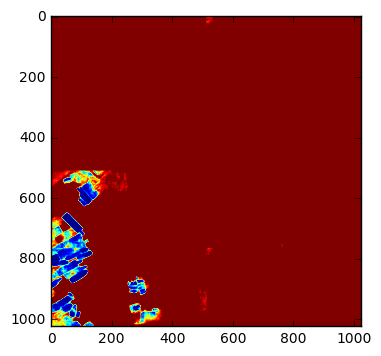

In [98]:
# Get Pan Image
pan_im = cv2.imread(pan.local_asset_path,-1)
plt.imshow(pan_im[500:,0:500],cmap=plt.get_cmap('gray'))

# Get Predicted Heatmap
plt.figure()
probs,_,hm,cm =i.get_prediction_assets(10972)
hm.download_asset()
hm_im = cv2.imread(hm.local_asset_path)
plt.imshow(hm_im,cmap=plt.get_cmap('gray'))

#Get Ground Truth Mask (cant figure out how to get it, so getting from confusion matrix)
plt.figure()
cm.download_asset()
cm_im = cv2.imread(cm.local_asset_path)

#Get Raw probs
probs.download_asset()
print probs.local_asset_path


In [99]:
test1_im = pan_im[500:1000,0:500]
test1_hm = hm_im[500:1000,0:500]
test1_cm = cm_im[500:1000,0:500]
probs_im = np.load(probs.local_asset_path)['arr_0']
test1_probs = probs_im[500:1000,0:500]

In [124]:
## CRF Realted stuff
import pydensecrf.densecrf as dcrf
from pydensecrf.utils import unary_from_labels, create_pairwise_bilateral, create_pairwise_gaussian, unary_from_softmax
d = dcrf.DenseCRF2D(500, 500, 1)
U = -np.log(test1_probs + 0.0000001)
U = U.reshape((1,-1))
print U.dtype
d.setUnaryEnergy(unary_from_softmax(U))
d.addPairwiseGaussian(sxy=(3,3), compat=3, kernel=dcrf.DIAG_KERNEL, normalization=dcrf.NORMALIZE_SYMMETRIC)


Q = d.inference(50)
map = np.argmax(Q, axis=0).reshape((500,500))
proba = np.array(Q)
print np.max(proba), np.min(proba)
plt.imshow(proba.reshape(500,500),cmap=plt.get_cmap('gray'))


float16


IndexError: index 1 is out of bounds for axis 0 with size 1